In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("dataset.csv", low_memory=False)

In [3]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,FBI


## Treating data

For The initial treating of this dataset, there are things needed to be done:

1) Check data types;

2) Drop columns that will not be used;

3) Handle missing values;

4) Handle Outliers;

## Checking data types

The data type of perpetrator's age was not seen as int initially, so there was the need to treat those values and transform them to NaN (there is only one row with an NA value in 'Perpetrator Age').

In [4]:
df.dtypes

Record ID            int64
Agency Code         object
Agency Name         object
Agency Type         object
City                object
State               object
Year                 int64
Month               object
Incident             int64
Crime Type          object
Crime Solved        object
Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age     object
Perpetrator Race    object
Relationship        object
Weapon              object
Record Source       object
dtype: object

In [5]:
# This code coerce the errors to become NaN
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors='coerce')

# The we drop those values
df = df.dropna(subset=['Perpetrator Age'])

# So we can transform it to type int64
df['Perpetrator Age'] = df['Perpetrator Age'].astype('int64')

df.dtypes

Record ID            int64
Agency Code         object
Agency Name         object
Agency Type         object
City                object
State               object
Year                 int64
Month               object
Incident             int64
Crime Type          object
Crime Solved        object
Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age      int64
Perpetrator Race    object
Relationship        object
Weapon              object
Record Source       object
dtype: object

Now I drop the single line with a NA value.

In [6]:
df['Perpetrator Age'].dropna(inplace=True)

## Dropping columns

In [7]:
drop_columns = ['Agency Code', 'Record Source', 'Agency Type', 'Agency Name']
df = df.drop(columns = drop_columns)

In [8]:
df

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Unknown,0,Unknown,Unknown,Handgun
638450,638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun
638451,638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation
638452,638453,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Male,31,White,Stranger,Knife


## Handling missing values

In this dataset many values were Unknown, or just had very weird number patterns so I will get rid of theses rows.

First we drop the Unknown values, that are usually related to crimes that were not solved and there is no knowledge about the Perpetrator's sex/Age, Weapon used etc. So those values will be dropped so we can work with a more precise information.

In [9]:
df.drop(df[(df == 'Unknown').any(axis=1)].index, inplace=True)

## Handling Outliers

To handle outliers we can use some plots to first identify them, and then do something about it.

I will use Histograms for the numerical data.

(The print below is represents the values of data before treatment)

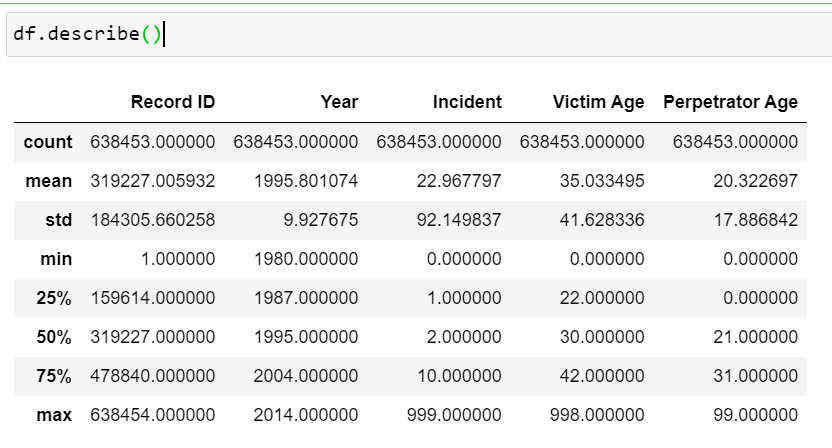

## Victim Age

For this column there were multiple values set to 998 before the dropping of the 'Unknown values' but after the inicial treatment this number dropped to 71. 

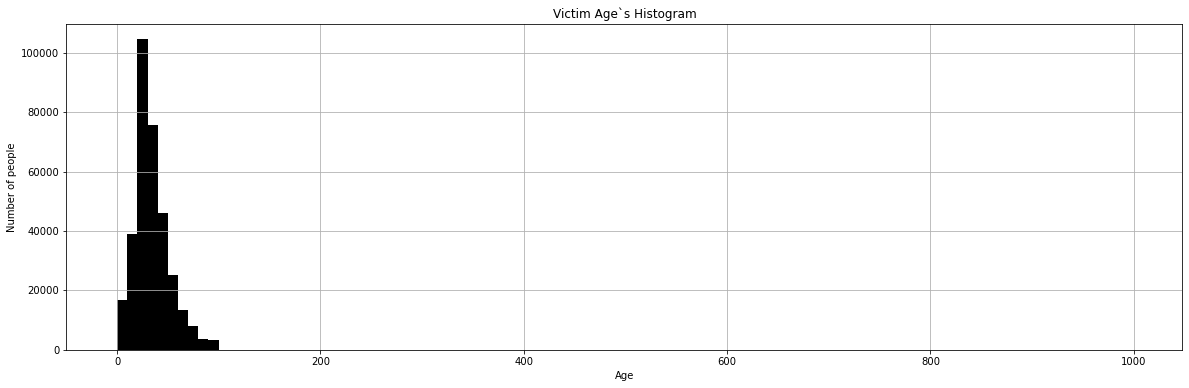

In [10]:
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=100, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

In [11]:
above_100 = (df['Victim Age'] == 998).sum()
above_100

71

For 'Victim Age' we can see that there are some entries in the 1000 years range (there are 71 values equals to 998 years old). To handle those, we would first replace these values with NA, and then transform those in a value according to the median.

In [12]:
df['Victim Age'] = df['Victim Age'].replace(998, pd.NA)
victim_age_median = df['Victim Age'].median()
df['Victim Age'].fillna(victim_age_median, inplace=True)
df['Victim Age'] = df['Victim Age'].astype('int64')

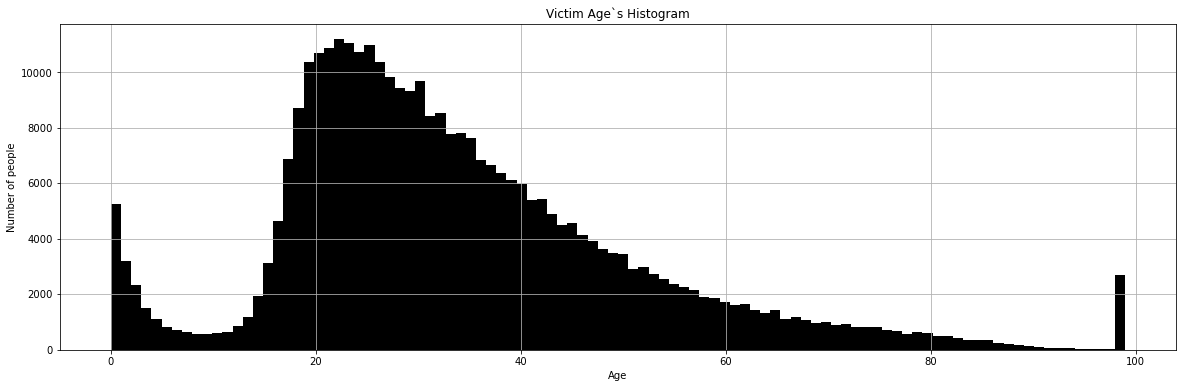

In [13]:
# New plot, without the 998 values
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=100, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

To deal with this outlier I used a method to handle missing data - Replacing the weird values with Random Values. I treated this as missing data because in no way there were so many 99 years old victims. There were simply too little 90-98 year olds dying from homicides to see this as proper data. So below I assign random values for the 99 yo victims.

In [48]:
v_non_99_values = df[df['Victim Age'] != 99]['Victim Age']
v_random_sample = np.random.choice(v_non_99_values, df['Victim Age'].eq(99).sum())
df.loc[df['Victim Age'] == 99, 'Victim Age'] = v_random_sample

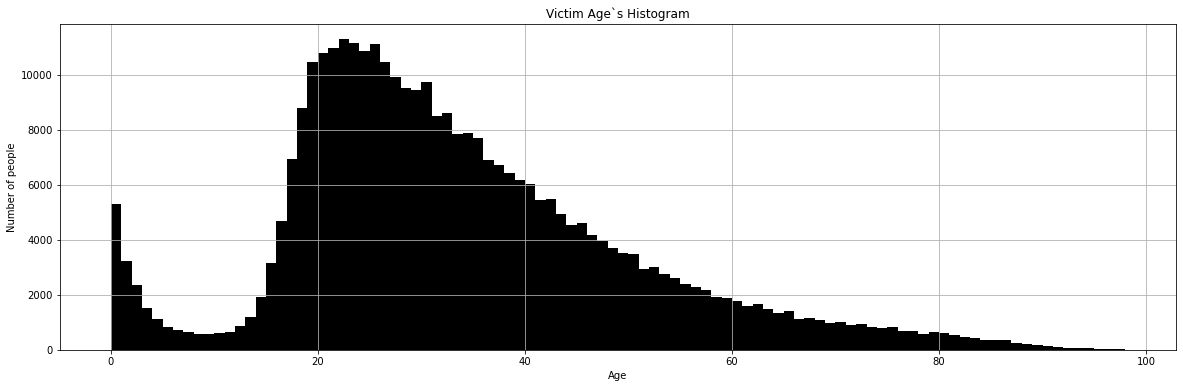

In [49]:
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=98, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

Also there is an unusual concentration of 99 years old victims in this graph, which makes me question how legit this data can be when so many are just outliering. But when I treat this data another anomally happens: The Median Age suffers a spike.

## Perpetrator Age

Here the problem is: there are many perpetrators (> 10k) that are said to be 0 years old, which is highly unlikely. So we will need to neutralise this spike. 

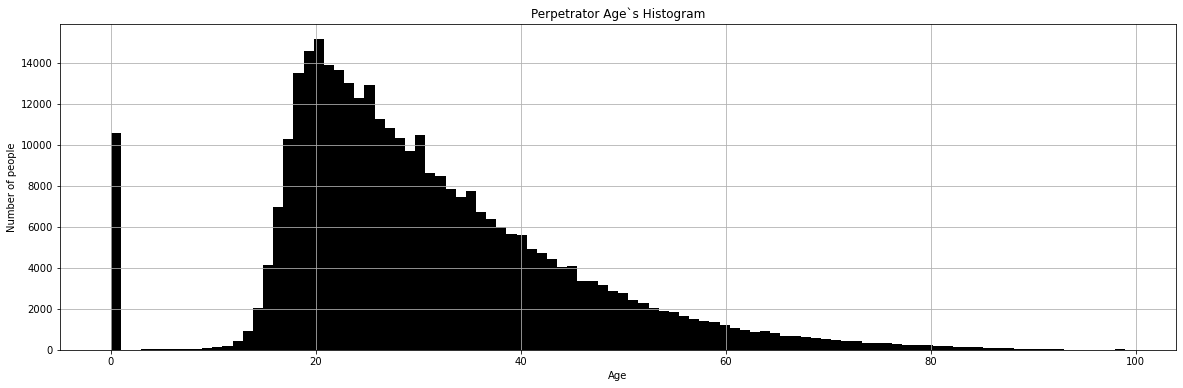

In [15]:
plt.figure(figsize=(20,6))
plt.hist(df['Perpetrator Age'], bins=100, color= 'black')
plt.title('Perpetrator Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

When it comes to 'Perpetrator's Age' we have many values being 0, representing the Age is unknown. I will deal with this the same way I dealt with the problem we had with Victim Ages being excessive on the 99 value. We will input random numbers.

Here all the crimes were solved, we have the information of the weapon used and the Victim data, its just the values of the Perpetrator's Age that were set to 0. So Randomise is a good option for handling this data.

In [53]:
p_non_0_values = df[df['Perpetrator Age'] != 0]['Perpetrator Age']
p_random_sample = np.random.choice(p_non_0_values, df['Perpetrator Age'].eq(0).sum())
df.loc[df['Perpetrator Age'] == 0, 'Perpetrator Age'] = p_random_sample

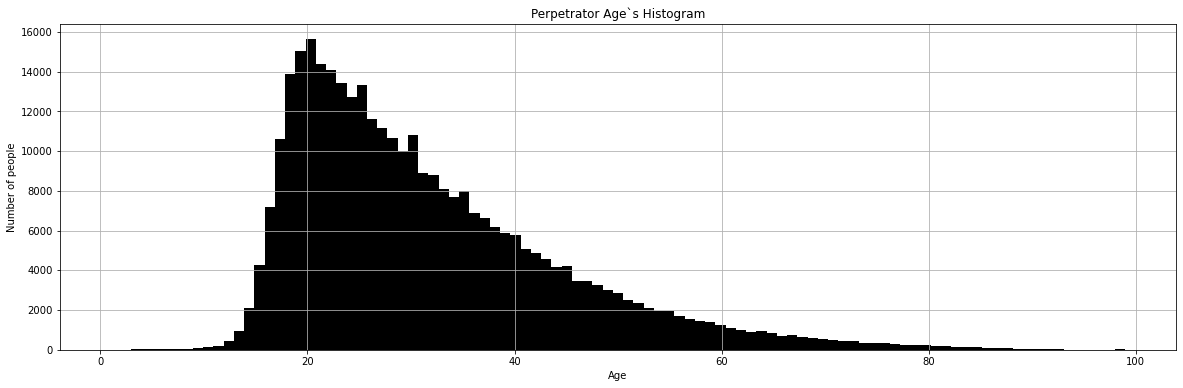

In [55]:
plt.figure(figsize=(20,6))
plt.hist(df['Perpetrator Age'], bins=99, color= 'black')
plt.title('Perpetrator Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

_______________________________________

## Tasks

a) Identify which variables are categorical, discrete and continuous in the chosen data set and show
using some visualization or plot. Explore whether there are missing values for any of the variables.

b) Calculate the statistical parameters (mean, median, minimum, maximum, and standard deviation)
for each of the numerical variables.

c) Apply Min-Max Normalization, Z-score Standardization and Robust scalar on the numerical data
variables.

d) Line, Scatter and Heatmaps can be used to show the correlation between the features of the
dataset.

e) Graphics and descriptive understanding should be provided along with Data Exploratory analysis
(EDA). Identify subgroups of features that can explore some interesting facts.

f) Apply dummy encoding to categorical variables (at least one variable used from the data set) and
discuss the benefits of dummy encoding to understand the categorical data.

g) Apply PCA with your chosen number of components. Write up a short profile of the first few
components extracted based on your understanding.

h) What is the purpose of dimensionality reduction? Explore the situations where you can gain the
benefit of dimensionality reduction for data analysis.

-----------------

# a) Identifying variables, showing visualisations and acknowledging the existence of missing values 

### Categorical:
These variables are not numerical and are identified based on their names, while grouped together. They are divided into Nominal and Ordinal data. In this dataset there are no ordinal variables and all the 'object' (according to data types) columns are categorical. 

Columns that are categorical: Agency Code, Agency Name, Agency Type, City, State, Month, Incident, Crime Type, Crime Solved, Victim Sex, Victim Race, Perpetrator Sex, Perpetrator Race, Relationship, Weapon, Record Source.

### Discrete:
Discrete values are the ones that can be counted and have a limited number of answers/values. 

The columns that have discrete values are: Record ID, Year, Incident, Victim Age, Perpetrator Age.

### Continuous:
Those are values that can take infinite numbers of values within a range. None of the columns in this dataset have this type of values.

### Missing Values:
In this dataset there was only one missing value (on 'Perpetrator Age') and because there was no other missing values and the deletion of one line would not impose a threat to misrepresent the data, the line was dropped. in the "Handling missing values" section above.

_____________________

# b) Calculate the Statistical Parameters for the numerical values

That can be done in python with the .describe() function, but I also did a breakdown below for a beter visualisation of the data that I considered interesting to analyse (Victim Age and Perpetrator Age).

In [18]:
df.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age
count,335618.000000,335618.000000,335618.00000,335618.000000,335618.000000
mean,295861.993510,1994.530481,10.45087,33.633515,30.365573
std,183902.362586,9.843173,46.51901,17.446083,14.006119
min,1.000000,1980.000000,0.00000,0.000000,0.000000
25%,134545.250000,1986.000000,1.00000,22.000000,21.000000
50%,283402.500000,1993.000000,2.00000,30.000000,28.000000
75%,450431.000000,2003.000000,6.00000,42.000000,38.000000
max,638454.000000,2014.000000,999.00000,99.000000,99.000000


## Mean Calculation

In [19]:
victim_age_mean = df['Victim Age'].mean()
perpetrator_age_mean = df['Perpetrator Age'].mean()

## Mean Values

In [20]:
print("The mean for the Victim Age values is: ", victim_age_mean)
print("The mean for the Year values is: ", perpetrator_age_mean)

The mean for the Victim Age values is:  33.633514888951126
The mean for the Year values is:  30.365573360189263


## Median calculation

In [21]:
victim_age_median = df['Victim Age'].median()
perpetrator_age_median = df['Perpetrator Age'].median()

## Median Values

In [22]:
print("The median for the Victim Age values is: ", victim_age_median)
print("The median for the Year values is: ", perpetrator_age_median)

The median for the Victim Age values is:  30.0
The median for the Year values is:  28.0


## Minimum and Maximum Values Calculation

In [23]:
minimum_year = df['Year'].min()
maximum_year = df['Year'].max()

minimum_victim_age = df['Victim Age'].min()
maximum_victim_age = df['Victim Age'].max()

minimum_perpetrator_age = df['Perpetrator Age'].min()
maximum_perpetrator_age = df['Perpetrator Age'].max()

## Minimum and Maximum Values

In [24]:
print("This dataset starts in ", minimum_year, "and finishes at ", maximum_year)
print("The youngest victims were ", minimum_victim_age, " years old, and the oldest", maximum_victim_age)
print("The youngest perpetrators were", minimum_perpetrator_age, "and the oldest were", maximum_perpetrator_age)

This dataset starts in  1980 and finishes at  2014
The youngest victims were  0  years old, and the oldest 99
The youngest perpetrators were 0 and the oldest were 99


## Standard Deviation


In [25]:
victim_age_std = df['Victim Age'].std()
perpetrator_age_std = df['Perpetrator Age'].std()

In [26]:
print("The Victim Age's Standard Deviation is: ", victim_age_std)
print("The Perpetrator Age's Standard Deviation is: ", perpetrator_age_std)

The Victim Age's Standard Deviation is:  17.446083081764545
The Perpetrator Age's Standard Deviation is:  14.006119128666736


____________


# c) Min-Max Normalisation, Z-score Standardisation and Robust Scaler

## Min-Max Normalization

For this calculation we have the following formula:

X* = X - min(X)/ max(X) - min(X)


In [27]:
scaler = MinMaxScaler()
df['Normalized Victim Age'] = scaler.fit_transform(df[['Victim Age']])
df['Normalized Perpetrator Age'] = scaler.fit_transform(df[['Perpetrator Age']])

In [28]:
df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242
5,6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,0.303030,0.363636
6,7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,0.424242,0.272727


## Z-Score

For this calculation we use the formula: X* = X - Mean(X) / Standard_Deviation(X)

In [29]:
df['Z-Score Victim Age'] = zscore(df['Victim Age'])
df['Z-Score Perpetrator Age'] = zscore(df['Perpetrator Age'])

In [30]:
df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,-1.125384,-1.097063
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669
5,6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,0.303030,0.363636,-0.208271,0.402284
6,7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,0.424242,0.272727,0.479563,-0.240293


## Robust Scaler

In [31]:
scaler = RobustScaler()
df['Robust Scaler Victim Age'] = scaler.fit_transform(df[['Victim Age']])
df['Robust Scaler Perpetrator Age'] = scaler.fit_transform(df[['Perpetrator Age']])

In [32]:
df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,...,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,-1.125384,-1.097063,-0.80,-0.764706
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,...,42,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,...,42,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529
5,6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,...,36,White,Acquaintance,Rifle,0.303030,0.363636,-0.208271,0.402284,0.00,0.470588
6,7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,...,27,Black,Wife,Knife,0.424242,0.272727,0.479563,-0.240293,0.60,-0.058824


_______________


# d) Line, Scatter and Heatmaps

### Perpetrator genders over the years

In [33]:
df['Year'] = pd.Categorical(df['Year'])
group_year_gender = df.groupby(['Year', 'Perpetrator Sex']).size().unstack(fill_value = 0)
group_year_gender

Perpetrator Sex,Female,Male
Year,,
1980,2109,11538
1981,2026,11488
1982,1925,11050
1983,1953,10498
1984,1659,9856
1985,1635,10118
1986,1780,10662
1987,1582,9876
1988,1450,9668


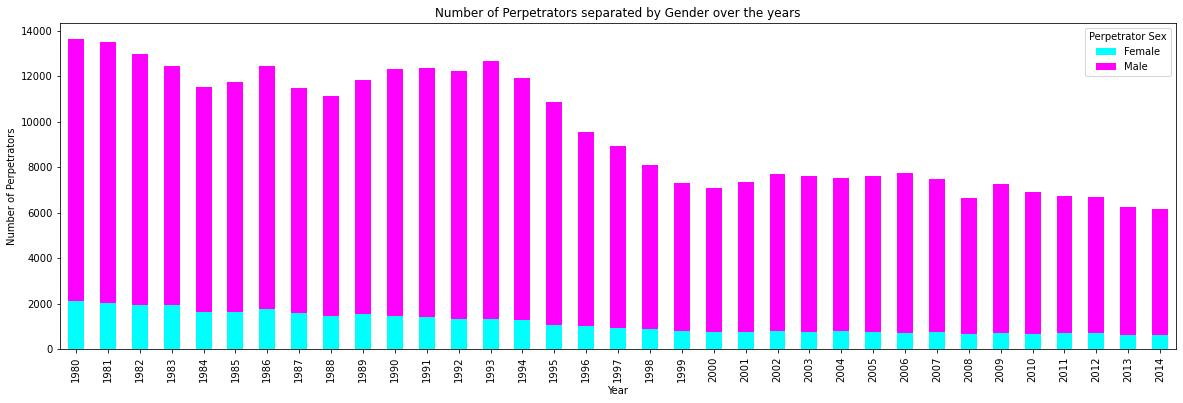

In [34]:
fig, ax = plt.subplots(figsize=(20,6))
group_year_gender.plot(kind = 'bar', stacked=True, ax=ax, colormap='cool')
plt.title('Number of Perpetrators separated by Gender over the years')
plt.xlabel('Year')
plt.ylabel('Number of Perpetrators')
plt.legend(title='Perpetrator Sex')
plt.show();

### Month with more homicides over the years

In [35]:
df['Month_Year'] = df['Month'] + ' ' + df['Year'].astype(str)
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format='%B %Y')

# This counts the incidents of homicide of each month of each year
higher_month = df.groupby(['Year', 'Month']).size().reset_index(name='Number of Homicides')

# idxmax() displays the first result of each month
higher_month_per_year = higher_month.loc[higher_month.groupby('Year')['Number of Homicides'].idxmax()]

# Here I just reseted the index to look better
higher_month_per_year = higher_month_per_year.reset_index(drop=True)

higher_month_per_year

,Year,Month,Number of Homicides
0,1980,August,1398
1,1981,July,1229
2,1982,May,1169
3,1983,December,1165
4,1984,December,1078
5,1985,August,1101
6,1986,July,1198
7,1987,May,1056
8,1988,August,1009
9,1989,July,1096


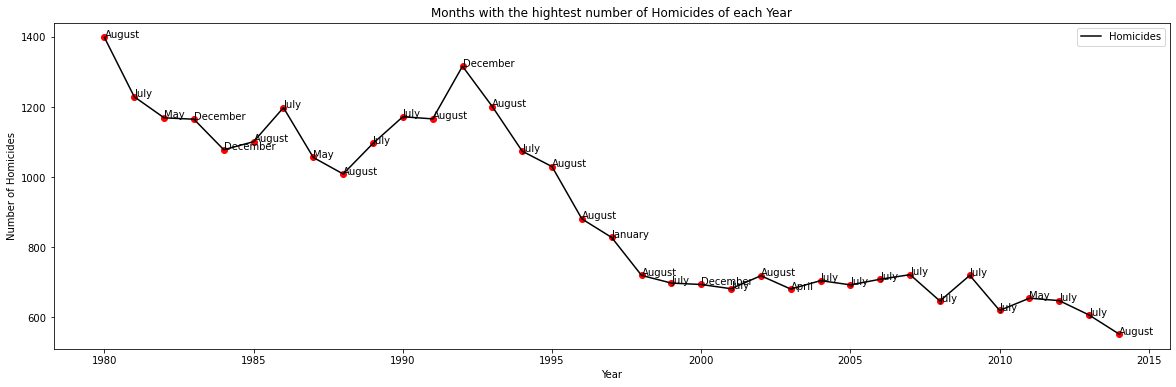

In [36]:
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(higher_month_per_year['Year'], higher_month_per_year['Number of Homicides'], linestyle='-', color='black', label='Homicides')
plt.scatter(higher_month_per_year['Year'], higher_month_per_year['Number of Homicides'], color='red')

# Code to generate notation on each dot
for i, txt in enumerate(higher_month_per_year['Month']):
    plt.annotate(txt, (higher_month_per_year.loc[i, 'Year'], higher_month_per_year.loc[i, 'Number of Homicides']))
    
plt.title('Months with the hightest number of Homicides of each Year')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.legend()
plt.show()

### Weapon Variety according to relationship

For this one I decided to create three heatmaps: the first one with the overall picture and the second with the exclusion of some less highlighted Weapons and relationships.

The Third Heatmap excluded the 'Handgun' as a Weapon and the relationships 'Stranger' and 'Acquaintance', so the other ones got more detail.

In [37]:
weapon_counts = df['Weapon'].value_counts()
weapon_counts

Handgun          166238
Knife             62212
Blunt Object      41524
Shotgun           22576
Rifle             16933
Firearm           12604
Strangulation      3835
Fire               3401
Suffocation        2613
Drugs              1177
Drowning            914
Gun                 780
Explosives          333
Poison              331
Fall                147
Name: Weapon, dtype: int64

In [38]:
relationship_counts = df['Relationship'].value_counts()
relationship_counts

Acquaintance            119505
Stranger                 82333
Wife                     22126
Friend                   20742
Girlfriend               15448
Family                    8943
Husband                   8513
Son                       8439
Boyfriend                 7019
Daughter                  6234
Neighbor                  6048
Brother                   5350
Father                    4152
Mother                    3905
In-Law                    3523
Common-Law Wife           2342
Common-Law Husband        1901
Ex-Wife                   1895
Stepfather                1318
Sister                    1233
Boyfriend/Girlfriend      1218
Stepson                   1113
Stepdaughter               697
Ex-Husband                 599
Employer                   477
Employee                   344
Stepmother                 201
Name: Relationship, dtype: int64

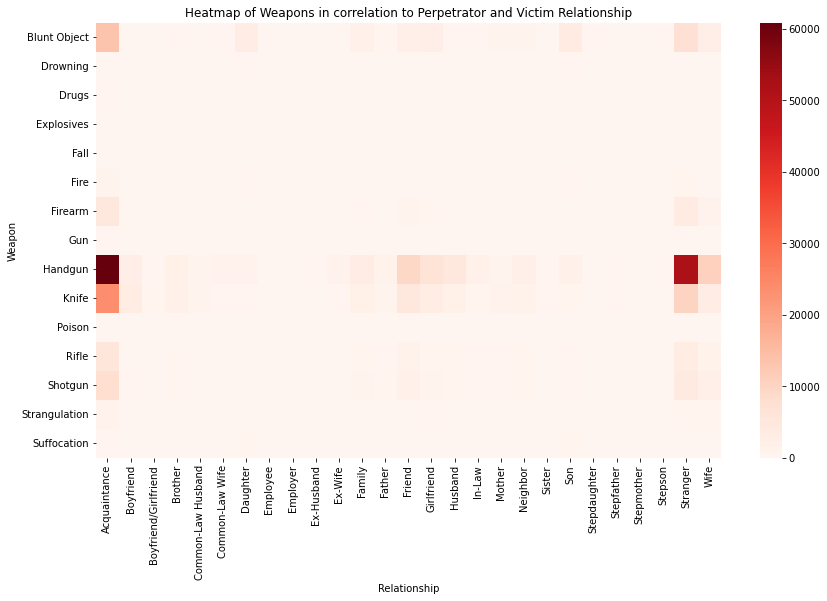

In [39]:
cross_tab = pd.crosstab(df['Weapon'], df['Relationship'])
plt.figure(figsize=(14,8))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

By Observing and running each time a new exclusion was mayde, I made this graph more heated by excluding categories that did not represent many of the occurrences

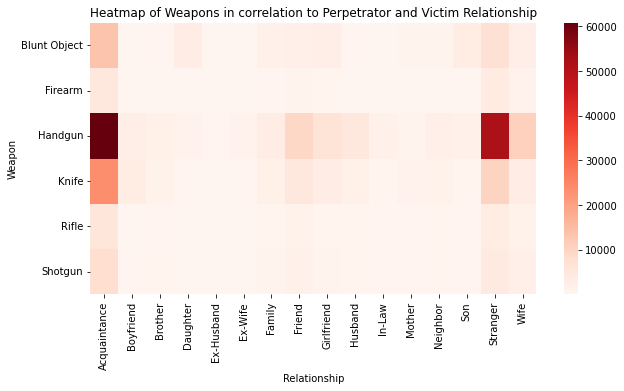

In [40]:
filtered_df = df[(df['Weapon'] != 'Drowning') & (df['Weapon'] != 'Drugs') & (df['Weapon'] != 'Explosives')
                 & (df['Weapon'] != 'Strangulation') & (df['Weapon'] != 'Suffocation') & (df['Weapon'] != 'Gun')
                 & (df['Weapon'] != 'Poison') & (df['Weapon'] != 'Fall') & (df['Weapon'] != 'Fire') 
                 & (df['Relationship'] != 'Boyfriend/Girlfriend') & (df['Relationship'] != 'Common-Law Husband')
                & (df['Relationship'] != 'Stepfather') & (df['Relationship'] != 'Stepmother') 
                 & (df['Relationship'] != 'Employee') & (df['Relationship'] != 'Employer')
                & (df['Relationship'] != 'Father') & (df['Relationship'] != 'Sister')
                & (df['Relationship'] != 'Stepdaughter') & (df['Relationship'] != 'Stepson')
                & (df['Relationship'] != 'Common-Law Wife')]

cross_tab = pd.crosstab(filtered_df['Weapon'], filtered_df['Relationship'])
plt.figure(figsize=(10,5))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

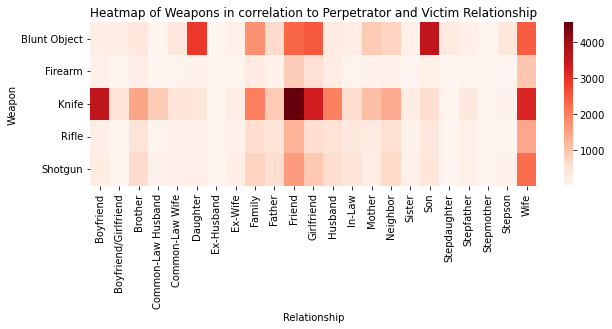

In [41]:
filtered_df = df[(df['Weapon'] != 'Handgun') & (df['Relationship'] != 'Stranger') & (df['Relationship'] != 'Acquaintance')
                 & (df['Relationship'] != 'Employee') & (df['Relationship'] != 'Employer') & (df['Weapon'] != 'Drowning') 
                 & (df['Weapon'] != 'Drugs') & (df['Weapon'] != 'Explosives')
                 & (df['Weapon'] != 'Strangulation') & (df['Weapon'] != 'Suffocation') & (df['Weapon'] != 'Gun')
                 & (df['Weapon'] != 'Poison') & (df['Weapon'] != 'Fall') & (df['Weapon'] != 'Fire')]

cross_tab = pd.crosstab(filtered_df['Weapon'], filtered_df['Relationship'])
plt.figure(figsize=(10,3))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

There is not much difference, just that stranger became the second most 'popular' category of relationships.

___________________________________

# e) Data Exploratory Analysis 

What are the questions I want to answer with this EDA? 

____________________________

# f) Dummy Coding

Here we will do Dummy Encoding to have Seasons. 

In [42]:
# month_order = {'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}

# month_dummies = pd.get_dummies(df['Month'], prefix='Month')

# season_mapping = {
#     'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
#     'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
#     'July': 'Summer', 'August': 'Summer', 'September': 'Autumn',
#     'October': 'Autumn', 'November': 'Autumn', 'December': 'Winter'
# }

# df['Season'] = df['Month'].map(season_mapping)

# df_encoded= pd.get_dummies(df, columns=['Season'], prefix='Season')

# df_encoded

In [43]:
df

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age,Month_Year
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,...,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,-1.125384,-1.097063,-0.80,-0.764706,1980-01-01
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,...,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529,1980-03-01
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,...,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529,1980-04-01
5,6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,...,White,Acquaintance,Rifle,0.303030,0.363636,-0.208271,0.402284,0.00,0.470588,1980-05-01
6,7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,...,Black,Wife,Knife,0.424242,0.272727,0.479563,-0.240293,0.60,-0.058824,1980-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638448,638449,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,Yes,Male,29,...,Black,Friend,Firearm,0.292929,0.676768,-0.265591,2.615605,-0.05,2.294118,2014-08-01
638450,638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,...,White,Acquaintance,Handgun,0.626263,0.575758,1.625954,1.901631,1.60,1.705882,2014-06-01
638451,638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,...,Asian/Pacific Islander,Daughter,Suffocation,0.000000,0.222222,-1.927858,-0.597281,-1.50,-0.352941,2014-09-01
638452,638453,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,...,White,Stranger,Knife,0.555556,0.313131,1.224717,0.045296,1.25,0.176471,2014-12-01


In [44]:
df_encoded = pd.get_dummies(df, columns=['Crime Type', 'Victim Sex', 'Perpetrator Sex','Relationship'], prefix= ['Crime Type', 'Victim Sex', 'Perpetrator Sex', 'Relationship'])
pd.set_option('display.max_columns', None)
df_encoded.head()

,Record ID,City,State,Year,Month,Incident,Crime Solved,Victim Age,Victim Race,Perpetrator Age,Perpetrator Race,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age,Month_Year,Crime Type_Manslaughter by Negligence,Crime Type_Murder or Manslaughter,Victim Sex_Female,Victim Sex_Male,Perpetrator Sex_Female,Perpetrator Sex_Male,Relationship_Acquaintance,Relationship_Boyfriend,Relationship_Boyfriend/Girlfriend,Relationship_Brother,Relationship_Common-Law Husband,Relationship_Common-Law Wife,Relationship_Daughter,Relationship_Employee,Relationship_Employer,Relationship_Ex-Husband,Relationship_Ex-Wife,Relationship_Family,Relationship_Father,Relationship_Friend,Relationship_Girlfriend,Relationship_Husband,Relationship_In-Law,Relationship_Mother,Relationship_Neighbor,Relationship_Sister,Relationship_Son,Relationship_Stepdaughter,Relationship_Stepfather,Relationship_Stepmother,Relationship_Stepson,Relationship_Stranger,Relationship_Wife
0,1,Anchorage,Alaska,1980,January,1,Yes,14,Native American/Alaska Native,15,Native American/Alaska Native,Blunt Object,0.141414,0.151515,-1.125384,-1.097063,-0.80,-0.764706,1980-01-01,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Anchorage,Alaska,1980,March,1,Yes,43,White,42,White,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529,1980-03-01,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Anchorage,Alaska,1980,April,1,Yes,43,White,42,White,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529,1980-04-01,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Anchorage,Alaska,1980,May,1,Yes,30,White,36,White,Rifle,0.303030,0.363636,-0.208271,0.402284,0.00,0.470588,1980-05-01,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Anchorage,Alaska,1980,May,2,Yes,42,Native American/Alaska Native,27,Black,Knife,0.424242,0.272727,0.479563,-0.240293,0.60,-0.058824,1980-05-01,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
df

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age,Month_Year
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,-1.125384,-1.097063,-0.80,-0.764706,1980-01-01
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529,1980-03-01
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,0.536883,0.830669,0.65,0.823529,1980-04-01
5,6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,0.303030,0.363636,-0.208271,0.402284,0.00,0.470588,1980-05-01
6,7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,0.424242,0.272727,0.479563,-0.240293,0.60,-0.058824,1980-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638448,638449,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,Yes,Male,29,Native American/Alaska Native,Male,67,Black,Friend,Firearm,0.292929,0.676768,-0.265591,2.615605,-0.05,2.294118,2014-08-01
638450,638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun,0.626263,0.575758,1.625954,1.901631,1.60,1.705882,2014-06-01
638451,638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0.000000,0.222222,-1.927858,-0.597281,-1.50,-0.352941,2014-09-01
638452,638453,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Male,31,White,Stranger,Knife,0.555556,0.313131,1.224717,0.045296,1.25,0.176471,2014-12-01


__________________

# g) Principal Component Analysis

_______________________

# h) Dimensionality Reduction: Purpose and Benefits